In [2]:
import tensorflow as tf
import pandas as pd
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping


In [3]:
filepath = 'speech audio\\'
maincsv = pd.read_csv('metadata_gender label.csv')
maincsv.head(10)

,SUB_ID,GENDER
0,NPHYFCYK,m
1,HTCFAFDO,m
2,XLIOSZXS,m
3,FONIOYTJ,m
4,DZEREGIM,m
5,MBYTGRBI,m
6,YQUPZEUJ,m
7,VXQWWWTL,m
8,OFOILIER,m
9,BLLALITL,m


In [4]:
trainpath = 'Train_Validation_Set\\'
train = pd.read_csv(trainpath+'train_set.csv')['name'].tolist()
test = pd.read_csv(trainpath + 'val_set.csv')['name'].tolist()

In [5]:
l2i ={'m':1,'f':0}

In [6]:
train_data = []
test_data = []
for index_num,row in tqdm(maincsv.iterrows()):
    gender = row['GENDER']
    frequency,sample = librosa.load(filepath + row['SUB_ID'] + '.flac', res_type='kaiser_fast')
    data = librosa.feature.mfcc(y=frequency,sr=sample,n_mfcc=40)
    mean = np.mean(data.T,axis=0)
    if row['SUB_ID'] in train:
        train_data.append((mean,l2i[gender]))
    if row['SUB_ID'] in test:
        test_data.append((mean,l2i[gender]))

965it [03:09,  5.09it/s]


In [7]:
data = pd.DataFrame(train_data,columns=['DATA','GENDER'])

In [8]:
data

,DATA,GENDER
0,"[-445.04013, 93.20227, 22.329016, 8.581382, -1...",1
1,"[-383.85425, 86.395226, 7.8908863, 14.984065, ...",1
2,"[-338.30194, 79.77276, 9.918324, 27.797224, 12...",1
3,"[-379.04102, 63.17794, -34.36277, 13.77275, -4...",1
4,"[-365.18454, 75.57949, 6.2696037, 23.17675, -2...",1
...,...,...
766,"[-337.29416, 110.069405, 10.481938, 1.2802697,...",0
767,"[-450.26736, 69.2186, 5.2589726, 16.642471, -4...",0
768,"[-397.02173, 117.6587, -10.10138, 11.001414, -...",0
769,"[-439.9569, 79.37368, 29.039349, 22.575642, 6....",0


In [9]:
x_train = np.array(data['DATA'].tolist())
y_train = np.array(data['GENDER'].tolist())
print(y_train)
le = LabelEncoder()
y_train = to_categorical(le.fit_transform(y_train))
print(x_train.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 

In [10]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [38]:
data = pd.DataFrame(test_data,columns=['DATA','GENDER'])
x_test = np.array(data['DATA'].tolist())
y_test = np.array(data['GENDER'].tolist())
le = LabelEncoder()
y_test = to_categorical(le.fit_transform(y_test))


In [12]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [13]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics



In [14]:
num_labels=y_test.shape[1]
num_labels

2

In [40]:


model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [43]:


model.compile(loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()],optimizer='adam')



In [44]:


## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 170
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)



Epoch 1/170
20/25 [=======================>......] - ETA: 0s - loss: 20.1136 - accuracy: 0.6438 - false_negatives_2: 228.0000 - false_positives_2: 228.0000
Epoch 1: val_loss improved from inf to 0.90223, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 2s 25ms/step - loss: 19.6339 - accuracy: 0.6459 - false_negatives_2: 273.0000 - false_positives_2: 273.0000 - val_loss: 0.9022 - val_accuracy: 0.6134 - val_false_negatives_2: 75.0000 - val_false_positives_2: 75.0000
Epoch 2/170
21/25 [========================>.....] - ETA: 0s - loss: 12.4542 - accuracy: 0.6027 - false_negatives_2: 267.0000 - false_positives_2: 267.0000
Epoch 2: val_loss did not improve from 0.90223
25/25 [==============================] - 0s 4ms/step - loss: 12.1826 - accuracy: 0.6044 - false_negatives_2: 305.0000 - false_positives_2: 305.0000 - val_loss: 1.6211 - val_accuracy: 0.7474 - val_false_negatives_2: 49.0000 - val_false_positives_2: 49.0000
Epoch 3/170
21/25 [======

Epoch 19/170
22/25 [=========================>....] - ETA: 0s - loss: 0.6930 - accuracy: 0.7159 - false_negatives_2: 200.0000 - false_positives_2: 200.0000
Epoch 19: val_loss did not improve from 0.54143
25/25 [==============================] - 0s 4ms/step - loss: 0.6997 - accuracy: 0.7121 - false_negatives_2: 222.0000 - false_positives_2: 222.0000 - val_loss: 0.6313 - val_accuracy: 0.7474 - val_false_negatives_2: 49.0000 - val_false_positives_2: 49.0000
Epoch 20/170
24/25 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.7357 - false_negatives_2: 203.0000 - false_positives_2: 203.0000
Epoch 20: val_loss did not improve from 0.54143
25/25 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.7341 - false_negatives_2: 205.0000 - false_positives_2: 205.0000 - val_loss: 0.6037 - val_accuracy: 0.7474 - val_false_negatives_2: 49.0000 - val_false_positives_2: 49.0000
Epoch 21/170
24/25 [===========================>..] - ETA: 0s - loss: 0.7493 - acc

Epoch 37/170
17/25 [===================>..........] - ETA: 0s - loss: 0.5724 - accuracy: 0.7482 - false_negatives_2: 137.0000 - false_positives_2: 137.0000
Epoch 37: val_loss did not improve from 0.54143
25/25 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7445 - false_negatives_2: 197.0000 - false_positives_2: 197.0000 - val_loss: 0.5607 - val_accuracy: 0.7474 - val_false_negatives_2: 49.0000 - val_false_positives_2: 49.0000
Epoch 38/170
24/25 [===========================>..] - ETA: 0s - loss: 0.5828 - accuracy: 0.7396 - false_negatives_2: 200.0000 - false_positives_2: 200.0000
Epoch 38: val_loss improved from 0.54143 to 0.53276, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.5817 - accuracy: 0.7406 - false_negatives_2: 200.0000 - false_positives_2: 200.0000 - val_loss: 0.5328 - val_accuracy: 0.7474 - val_false_negatives_2: 49.0000 - val_false_positives_2: 49.0000
Epoch 39/170
21/25 [==

Epoch 54/170
18/25 [====================>.........] - ETA: 0s - loss: 0.5109 - accuracy: 0.7812 - false_negatives_2: 126.0000 - false_positives_2: 126.0000
Epoch 54: val_loss did not improve from 0.38467
25/25 [==============================] - 0s 4ms/step - loss: 0.5046 - accuracy: 0.7704 - false_negatives_2: 177.0000 - false_positives_2: 177.0000 - val_loss: 0.4284 - val_accuracy: 0.7474 - val_false_negatives_2: 49.0000 - val_false_positives_2: 49.0000
Epoch 55/170
21/25 [========================>.....] - ETA: 0s - loss: 0.4904 - accuracy: 0.7783 - false_negatives_2: 149.0000 - false_positives_2: 149.0000
Epoch 55: val_loss did not improve from 0.38467
25/25 [==============================] - 0s 8ms/step - loss: 0.4984 - accuracy: 0.7717 - false_negatives_2: 176.0000 - false_positives_2: 176.0000 - val_loss: 0.4113 - val_accuracy: 0.7577 - val_false_negatives_2: 47.0000 - val_false_positives_2: 47.0000
Epoch 56/170
19/25 [=====================>........] - ETA: 0s - loss: 0.4767 - acc

24/25 [===========================>..] - ETA: 0s - loss: 0.4037 - accuracy: 0.8203 - false_negatives_2: 138.0000 - false_positives_2: 138.0000
Epoch 71: val_loss improved from 0.29650 to 0.27938, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 9ms/step - loss: 0.4046 - accuracy: 0.8197 - false_negatives_2: 139.0000 - false_positives_2: 139.0000 - val_loss: 0.2794 - val_accuracy: 0.8918 - val_false_negatives_2: 21.0000 - val_false_positives_2: 21.0000
Epoch 72/170
22/25 [=========================>....] - ETA: 0s - loss: 0.3709 - accuracy: 0.8537 - false_negatives_2: 103.0000 - false_positives_2: 103.0000
Epoch 72: val_loss did not improve from 0.27938
25/25 [==============================] - 0s 4ms/step - loss: 0.3811 - accuracy: 0.8470 - false_negatives_2: 118.0000 - false_positives_2: 118.0000 - val_loss: 0.2924 - val_accuracy: 0.8866 - val_false_negatives_2: 22.0000 - val_false_positives_2: 22.0000
Epoch 73/170
25/25 [===============

24/25 [===========================>..] - ETA: 0s - loss: 0.3411 - accuracy: 0.8633 - false_negatives_2: 105.0000 - false_positives_2: 105.0000
Epoch 88: val_loss did not improve from 0.24908
25/25 [==============================] - 0s 4ms/step - loss: 0.3401 - accuracy: 0.8638 - false_negatives_2: 105.0000 - false_positives_2: 105.0000 - val_loss: 0.2593 - val_accuracy: 0.9072 - val_false_negatives_2: 18.0000 - val_false_positives_2: 18.0000
Epoch 89/170
23/25 [==========================>...] - ETA: 0s - loss: 0.3224 - accuracy: 0.8764 - false_negatives_2: 91.0000 - false_positives_2: 91.0000
Epoch 89: val_loss improved from 0.24908 to 0.24020, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 0.3223 - accuracy: 0.8768 - false_negatives_2: 95.0000 - false_positives_2: 95.0000 - val_loss: 0.2402 - val_accuracy: 0.9124 - val_false_negatives_2: 17.0000 - val_false_positives_2: 17.0000
Epoch 90/170
22/25 [===================

Epoch 106/170
18/25 [====================>.........] - ETA: 0s - loss: 0.2918 - accuracy: 0.8958 - false_negatives_2: 60.0000 - false_positives_2: 60.0000
Epoch 106: val_loss did not improve from 0.23693
25/25 [==============================] - 0s 4ms/step - loss: 0.2936 - accuracy: 0.8846 - false_negatives_2: 89.0000 - false_positives_2: 89.0000 - val_loss: 0.2428 - val_accuracy: 0.9175 - val_false_negatives_2: 16.0000 - val_false_positives_2: 16.0000
Epoch 107/170
24/25 [===========================>..] - ETA: 0s - loss: 0.3351 - accuracy: 0.8802 - false_negatives_2: 92.0000 - false_positives_2: 92.0000
Epoch 107: val_loss did not improve from 0.23693
25/25 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.8807 - false_negatives_2: 92.0000 - false_positives_2: 92.0000 - val_loss: 0.2559 - val_accuracy: 0.9175 - val_false_negatives_2: 16.0000 - val_false_positives_2: 16.0000
Epoch 108/170
21/25 [========================>.....] - ETA: 0s - loss: 0.2842 - accura

Epoch 124/170
24/25 [===========================>..] - ETA: 0s - loss: 0.2715 - accuracy: 0.9089 - false_negatives_2: 70.0000 - false_positives_2: 70.0000
Epoch 124: val_loss did not improve from 0.23693
25/25 [==============================] - 0s 3ms/step - loss: 0.2731 - accuracy: 0.9079 - false_negatives_2: 71.0000 - false_positives_2: 71.0000 - val_loss: 0.2420 - val_accuracy: 0.9175 - val_false_negatives_2: 16.0000 - val_false_positives_2: 16.0000
Epoch 125/170
24/25 [===========================>..] - ETA: 0s - loss: 0.2806 - accuracy: 0.8997 - false_negatives_2: 77.0000 - false_positives_2: 77.0000
Epoch 125: val_loss did not improve from 0.23693
25/25 [==============================] - 0s 3ms/step - loss: 0.2797 - accuracy: 0.9001 - false_negatives_2: 77.0000 - false_positives_2: 77.0000 - val_loss: 0.2494 - val_accuracy: 0.9175 - val_false_negatives_2: 16.0000 - val_false_positives_2: 16.0000
Epoch 126/170
25/25 [==============================] - ETA: 0s - loss: 0.2792 - accura

Epoch 142/170
23/25 [==========================>...] - ETA: 0s - loss: 0.2251 - accuracy: 0.9090 - false_negatives_2: 67.0000 - false_positives_2: 67.0000
Epoch 142: val_loss did not improve from 0.23693
25/25 [==============================] - 0s 3ms/step - loss: 0.2424 - accuracy: 0.9105 - false_negatives_2: 69.0000 - false_positives_2: 69.0000 - val_loss: 0.2655 - val_accuracy: 0.9175 - val_false_negatives_2: 16.0000 - val_false_positives_2: 16.0000
Epoch 143/170
 1/25 [>.............................] - ETA: 0s - loss: 0.5443 - accuracy: 0.8750 - false_negatives_2: 4.0000 - false_positives_2: 4.0000
Epoch 143: val_loss did not improve from 0.23693
25/25 [==============================] - 0s 3ms/step - loss: 0.2424 - accuracy: 0.9079 - false_negatives_2: 71.0000 - false_positives_2: 71.0000 - val_loss: 0.2459 - val_accuracy: 0.9175 - val_false_negatives_2: 16.0000 - val_false_positives_2: 16.0000
Epoch 144/170
25/25 [==============================] - ETA: 0s - loss: 0.2375 - accuracy

Epoch 160/170
21/25 [========================>.....] - ETA: 0s - loss: 0.2361 - accuracy: 0.9122 - false_negatives_2: 59.0000 - false_positives_2: 59.0000
Epoch 160: val_loss did not improve from 0.23693
25/25 [==============================] - 0s 4ms/step - loss: 0.2284 - accuracy: 0.9144 - false_negatives_2: 66.0000 - false_positives_2: 66.0000 - val_loss: 0.2753 - val_accuracy: 0.9124 - val_false_negatives_2: 17.0000 - val_false_positives_2: 17.0000
Epoch 161/170
24/25 [===========================>..] - ETA: 0s - loss: 0.2418 - accuracy: 0.9076 - false_negatives_2: 71.0000 - false_positives_2: 71.0000
Epoch 161: val_loss did not improve from 0.23693
25/25 [==============================] - 0s 3ms/step - loss: 0.2410 - accuracy: 0.9079 - false_negatives_2: 71.0000 - false_positives_2: 71.0000 - val_loss: 0.2675 - val_accuracy: 0.9124 - val_false_negatives_2: 17.0000 - val_false_positives_2: 17.0000
Epoch 162/170
24/25 [===========================>..] - ETA: 0s - loss: 0.2105 - accura

In [39]:


# loss,accuracy,falsNegatives,falsePos=model.evaluate(x_test,y_test,verbose=0)
# print(f"loss: {loss}, accuracy: {accuracy} \n false Negative:{falsNegatives}, false Positive: {falsePos}")
# print(f"total amnt :{len(x_test)}")
print(model.evaluate(x_test,y_test,verbose=0))

loss: 0.2760414183139801, accuracy: 0.9175257682800293 
 false Negative:16.0, false Positive: 16.0
total amnt :194


7/7 [==============================] - 0s 2ms/step


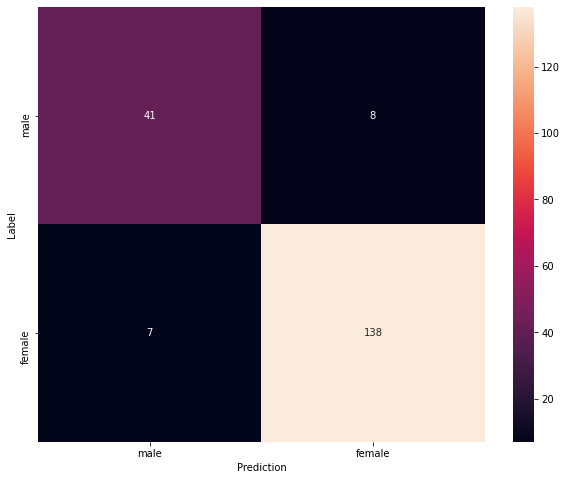

0.8942294159042927 :Balanced Accuracy


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
y_pred = np.argmax(model.predict(x_test),axis=1)
data = pd.DataFrame(test_data,columns=['DATA','GENDER'])
y_test = np.array(data['GENDER'].tolist())
y_true = y_test
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
balanced_accuracy = sklearn.metrics.balanced_accuracy_score(y_true,y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=['male','female'],
            yticklabels=['male','female'],
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(balanced_accuracy,":Balanced Accuracy")

In [160]:
filename = r"C:\Users\adity.DESKTOP-DIU3TF0\api\file2.wav"
audio,sample_rate = librosa.load(filename,res_type='kaiser_fast')
mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
x_predict=model.predict(mfccs_scaled_features)
predicted_label = np.argmax(x_predict,axis=1)
print(predicted_label)
prediction_class = le.inverse_transform(predicted_label)
print(prediction_class)

1/1 [==============================] - 0s 17ms/step
[1]
[1]


In [161]:
from keras.models import load_model
k = load_model('saved_models/audio_classification.hdf5')

In [162]:
model = k
filename = r"C:\Users\adity.DESKTOP-DIU3TF0\api\file2.wav"
audio,sample_rate = librosa.load(filename,res_type='kaiser_fast')
mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
x_predict=model.predict(mfccs_scaled_features)
predicted_label = np.argmax(x_predict,axis=1)
print(predicted_label)
prediction_class = le.inverse_transform(predicted_label)
print(prediction_class)

1/1 [==============================] - 0s 61ms/step
[1]
[1]
